In [1]:
# Machine Learning Assignment 3 (21100042)
## Preprocessing Stage:

In [36]:
import glob
import re
import pandas as pd
import numpy as np
import math

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
# Count positive and negative words in reviews
def counting_words(word_list, review_list):
    return len([each for each in word_list if each in review_list])

In [4]:
# This function adds a column of positive and negative words
def counting_and_adding_negative_and_positive_words(data_frame, positive_words, negative_words):
    postive_list = []
    negative_list = []
    for i in range(data_frame['Review'].count()):
        positive_word = counting_words(positive_words, data_frame['Review'][i])
        postive_list.append(positive_word)
        negative_word = counting_words(negative_words, data_frame['Review'][i])
        negative_list.append(negative_word)
    data_frame['x1'] = postive_list
    data_frame['x2'] = negative_list

In [5]:
# Function to read the whole file
def read_whole_file(filename):
    sentence = ''
    with open(filename, encoding="utf8") as f:
        sentence = f.readlines()
    match = filename.split("_",1)[1].replace(".txt", "")
    return sentence[0], match 

In [6]:
# Preprocessing training data
def preprocessing_and_storing(path):
    all_files = []
    review_number = []
    folder_path = "Dataset/" + path
    txt_files = glob.glob(folder_path + "*.txt")
    output_strings = map(read_whole_file, sorted(txt_files))
    for file in txt_files:
        sentence, match = read_whole_file(file)   
        all_files.append(sentence)
        review_number.append(match)
    return all_files, review_number    

In [7]:
def cleaning_the_data(data_list,stop_words):
    # Converted to lower case
    data_list = data_list.str.lower()
    # Removed stop words from the data
    stop = r'\b(?:{})\b'.format('|'.join(stop_words))
    data_list = data_list.str.replace(stop, '')
    data_list = data_list.str.replace(r'\s+', ' ')
    # Removed punctuation from the data
    data_list = data_list.str.replace('[^\w\s]','')
    return data_list

In [8]:
def sigmoid(value):
    z = 1/(1 + np.exp(-value))
    return z

In [9]:
def compute_tp_tn_fn_fp(y_actual, y_predicted):
    tp = sum((y_actual == 1) & (y_predicted == 1))
    tn = sum((y_actual == 0) & (y_predicted == 0))
    fp = sum((y_actual == 0) & (y_predicted == 1))
    fn = sum((y_actual == 1) & (y_predicted == 0))
    return tp, tn, fp, fn

In [10]:
def predict_and_print_accuracy(theta, Training_data, Testing_data):
    Sample_test = Testing_data[['x0', 'x1', 'x2']]
    list1 = []
    for i in range(Testing_data['Review'].count()):
        value = sigmoid((Testing_data['x0'][i] * theta[0]) + (Testing_data['x1'][i] * theta[1]) + (Testing_data['x2'][i] * theta[2]))
        if value >= 0.5:
            list1.append(1)
        else:
            list1.append(0)
    
    count = 0
    for i in range(Testing_data['Review'].count()):
        if list1[i] == Testing_data['y'][i]:
            count = count + 1 
    print('Accuracy: \n', count/Testing_data['Review'].count())
    
    Testing_data['predicted'] = list1
    tp, tn, fp, fn =  compute_tp_tn_fn_fp(Testing_data['y'], Testing_data['predicted'])
    data = [[tp, fp],
            [fn, tn]]

    # define labels
    labels = ["1", "0"]
    
    sn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    sn.set(font_scale=1.4)
    ax = sn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()  

In [59]:
def plot_loss(cost_list, costlist2):
    plt.plot(cost_list, 'g', label='Training loss')
    plt.plot(costlist2, 'b', label='validation loss')
#     loss_val = costlist2
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
#     loss_train = cost_list
#     loss_val = costlist2
#     epochs = 1500
#     plt.plot(epochs, loss_train, 'g', label='Training loss')
#     plt.plot(epochs, loss_val, 'b', label='validation loss')
#     plt.title('Training and Validation loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

In [12]:
# We saved the training data, test data and stop words in variables
stop_words_file = 'Dataset/stop_words.txt'
positive_file = 'Dataset/positive_words.txt'
negative_file = 'Dataset/negative_words.txt'
stop_words = ''
positive_words = ''
negative_words = ''

In [13]:
with open(stop_words_file) as f:
    stop_words = f.readlines()
    
with open(positive_file) as f:
    positive_words = f.readlines()
    
with open(negative_file) as f:
    negative_words = f.readlines()

In [14]:
# Removed the new line character form all of the words
stop_words = [x.replace('\n', '') for x in stop_words]
positive_words = [x.replace('\n', '') for x in positive_words]
negative_words = [x.replace('\n', '') for x in negative_words]

In [15]:
train_data_pos, train_pos_review = preprocessing_and_storing('train/pos/')
train_data_neg, train_neg_review = preprocessing_and_storing('train/neg/')
test_data_pos, test_pos_review = preprocessing_and_storing('test/pos/')
test_data_neg, test_neg_review = preprocessing_and_storing('test/neg/')

In [16]:
data1 = {'Review': train_data_pos,
        'Rating': train_pos_review,
        'x0': 1,
        'y': 1
        }

data2 = {'Review': train_data_neg,
        'Rating': train_neg_review,
        'x0': 1,
        'y': 0
        }

data3 = {'Review': test_data_pos,
        'Rating': test_pos_review,
        'x0': 1,
        'y': 1
        }

data4 = {'Review': test_data_neg,
        'Rating': test_neg_review,
        'x0': 1,
        'y': 0
        }

In [17]:
train_positive = pd.DataFrame(data1, columns = ['Review','Rating', 'x0', 'y'])
train_negative = pd.DataFrame(data2, columns = ['Review','Rating', 'x0', 'y'])
test_positive = pd.DataFrame(data3, columns = ['Review','Rating', 'x0', 'y'])
test_negative = pd.DataFrame(data4, columns = ['Review','Rating', 'x0', 'y'])

In [18]:
train_positive['Review'] = cleaning_the_data(train_positive['Review'], stop_words)
train_negative['Review'] = cleaning_the_data(train_negative['Review'], stop_words)
test_positive['Review'] = cleaning_the_data(test_positive['Review'], stop_words)
test_negative['Review'] = cleaning_the_data(test_negative['Review'], stop_words)

In [19]:
counting_and_adding_negative_and_positive_words(train_positive, positive_words, negative_words)
counting_and_adding_negative_and_positive_words(train_negative, positive_words, negative_words)
counting_and_adding_negative_and_positive_words(test_positive, positive_words, negative_words)
counting_and_adding_negative_and_positive_words(test_negative, positive_words, negative_words)

In [20]:
train_positive

,Review,Rating,x0,y,x1,x2
0,bromwell high cartoon comedy ran time programs...,9,1,1,7,14
1,homelessness houselessness george carlin stat...,8,1,1,15,34
2,brilliant acting lesley ann warren best dramat...,10,1,1,15,13
3,easily underrated film inn brooks cannon sure...,7,1,1,10,19
4,typical mel brooks film much less slapstick m...,8,1,1,5,9
...,...,...,...,...,...,...
12495,seeing vote average pretty low fact clerk vide...,9,1,1,16,6
12496,plot wretched unbelievable twists however che...,8,1,1,8,10
12497,amazed movie others average 5 stars lower cra...,10,1,1,23,36
12498,christmas together actually came time raised...,8,1,1,13,7


In [21]:
Training_data = train_positive.append(train_negative)
Training_data = Training_data.sample(frac = 1).reset_index(drop=True) 

In [22]:
Testing_data = test_positive.append(test_negative)
Testing_data = Testing_data.sample(frac = 1).reset_index(drop=True)

In [23]:
def model(X,theta):
    return X @ theta

In [39]:
SampleTrain = Training_data[['x0', 'x1', 'x2']]
SampleTest = Testing_data[['x0', 'x1', 'x2']]

In [40]:
def sigmoid(value):
    z = 1/(1 + np.exp(-value))
    return z

In [41]:
# This is the loss function
def cross_entropy(X, Y, weights):
    return -(1.0/Y.size)* sum((Y*np.log(0.00000000001 + sigmoid(model(X,weights))) + (1-Y)*np.log(0.00000000001 + 1-sigmoid(model(X,weights)))))

In [42]:
def gradientDescent_multi(X, Y, alpha, n_epoch):
    theta = np.ones(3)
    m = Y.size  
    J = []
    for i in range(n_epoch):
        theta = theta - alpha*(1/m)*np.transpose(X)@(sigmoid(X@theta) - Y)
        cost_val = cross_entropy(X, Y, theta)
        J.append(cost_val)
    return J, theta

In [43]:
X_train, X_val, y_train, y_val = train_test_split(SampleTrain, Training_data['y'], test_size=0.2, random_state=1)

In [71]:
n_epoch = 1500
alpha = 0.01

J, thetha = gradientDescent_multi(X_train, y_train, alpha, n_epoch)
J2, thetha2 = gradientDescent_multi(X_val, y_val, alpha, n_epoch)

In [72]:
print('Coefficients:\n', thetha)

Coefficients:
 x0    0.163689
x1    0.163309
x2   -0.109211
dtype: float64


In [73]:
print('Cross entropy: \n', J[-1])

Cross entropy: 
 0.5837358750798354


Accuracy: 
 0.70364


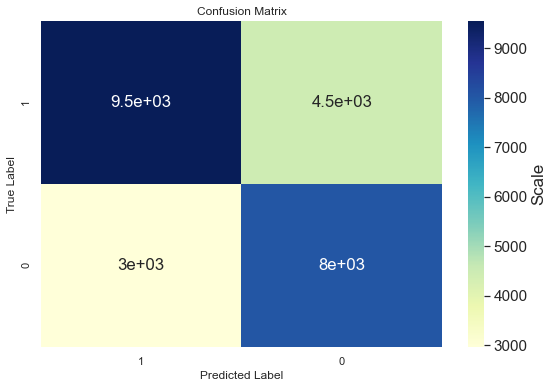

In [74]:
predict_and_print_accuracy(thetha, Training_data, Testing_data)

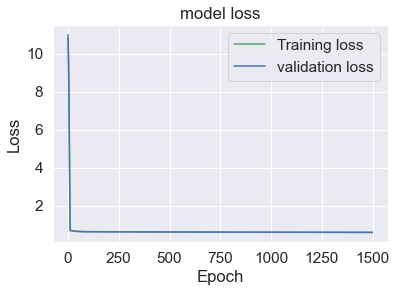

In [75]:
# Report plots with no. of iterations/ epochs on x-axis and training/ validation loss on y-axis.
plot_loss(J, J2)

In [33]:
# Part 2

In [34]:
X_train = Training_data[['x0', 'x1','x2']]
y_train = Training_data['y']

In [35]:
X_test = Testing_data[['x0', 'x1','x2']]
y_test = Testing_data['y']

In [81]:
logistic= LogisticRegression()
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

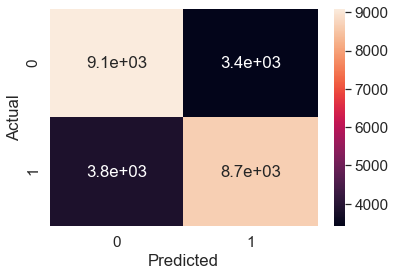

In [82]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [83]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy: 0.7098
